In [2]:
import numpy as np
import awkward as ak
import uproot
import matplotlib.pyplot as plt

In [3]:
root_file_dir= '~/Desktop/ROOT_files/'
file= uproot.open(root_file_dir + 'flat_caf_0-833995dc-14a2-47e7-9a95-91e25102b7ef.root:recTree;29')

In [4]:
file.keys()

['rec.crt_hits..length',
 'rec.crt_hits.pe',
 'rec.crt_hits.plane',
 'rec.crt_hits.position.x',
 'rec.crt_hits.position.y',
 'rec.crt_hits.position.z',
 'rec.crt_hits.position_err.x',
 'rec.crt_hits.position_err.y',
 'rec.crt_hits.position_err.z',
 'rec.crt_hits.t0',
 'rec.crt_hits.t1',
 'rec.crt_hits.time',
 'rec.crt_tracks..length',
 'rec.crt_tracks.hita.pe',
 'rec.crt_tracks.hita.plane',
 'rec.crt_tracks.hita.position.x',
 'rec.crt_tracks.hita.position.y',
 'rec.crt_tracks.hita.position.z',
 'rec.crt_tracks.hita.position_err.x',
 'rec.crt_tracks.hita.position_err.y',
 'rec.crt_tracks.hita.position_err.z',
 'rec.crt_tracks.hita.t0',
 'rec.crt_tracks.hita.t1',
 'rec.crt_tracks.hita.time',
 'rec.crt_tracks.hitb.pe',
 'rec.crt_tracks.hitb.plane',
 'rec.crt_tracks.hitb.position.x',
 'rec.crt_tracks.hitb.position.y',
 'rec.crt_tracks.hitb.position.z',
 'rec.crt_tracks.hitb.position_err.x',
 'rec.crt_tracks.hitb.position_err.y',
 'rec.crt_tracks.hitb.position_err.z',
 'rec.crt_tracks.hitb.

In [5]:
file['rec.slc.reco.shw..totarraysize'].arrays()

<Array [{...}, {...}, {...}, ..., {...}, {...}] type='4816 * {"rec.slc.reco...'>

In [6]:
file['rec.reco.trk.chi2pid.2.chi2_muon'].array()[56]

<Array [9.84, 10.3, 6.13, 13.7, 16.4, 6.28, 12.4] type='7 * float32'>

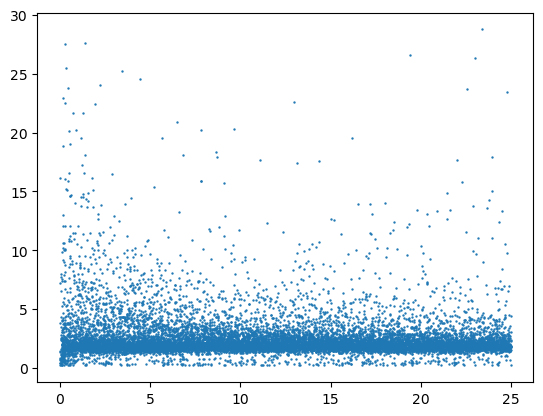

In [7]:
energy= ak.flatten(file['rec.reco.trk.calo.1.points.rr'].array()).to_numpy()[:15000]
dedx= ak.flatten(file['rec.reco.trk.calo.1.points.dedx'].array()).to_numpy()[:15000]

remove= np.where((dedx>30)|(energy>25))
energy= np.delete(energy, remove)
dedx= np.delete(dedx, remove)

plt.scatter(energy, dedx, s=0.5)


(array([6368., 4959., 4454., 4203., 4082., 4056., 3981., 3960., 3911.,
        3827., 3846., 3862., 3829., 3754., 3748., 3750., 3739., 3733.,
        3686., 3642., 3599., 3659., 3581., 3617., 3504., 3556., 3500.,
        3566., 3421., 3504., 3370., 3462., 3366., 3330., 3311., 3335.,
        3317., 3238., 3373., 3274., 3227., 3298., 3275., 3278., 3191.,
        3196., 3257., 3182., 3145., 3174., 3172., 3072., 3171., 3026.,
        3073., 3082., 3062., 3107., 3019., 3027., 3084., 2970., 3024.,
        3024., 2964., 3052., 2964., 3001., 2945., 2903., 3000., 2871.,
        2990., 2860., 2947.,  129.,  114.,  119.,  124.,  117.,  128.,
         132.,  131.,  132.,  118.,  112.,  116.,  111.,  112.,  113.,
         126.,  102.,  126.,  134.,  124.,  109.,  106.,  113.,  112.,
         120.,  116.,  101.,  125.,  112.,  101.,  110.,  112.,  102.,
         106.,   98.,  112.,  118.,  108.,  103.,  108.,  106.,   95.,
         102.,  100.,   93.,  105.,   77.,  107.,   95.,   89.,  102.,
      

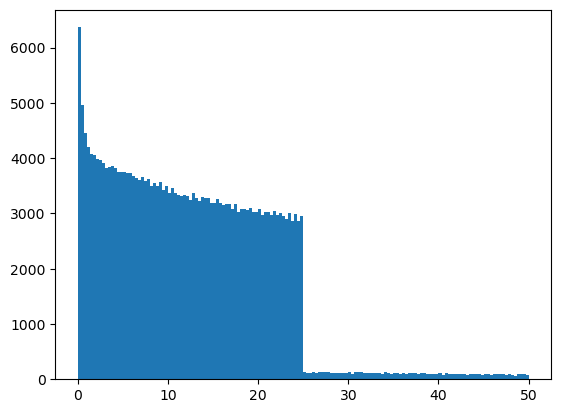

In [37]:
a= ak.flatten(file['rec.reco.trk.calo.2.points.rr'].array())
plt.hist(a[a<50], bins= 150)

(array([ 2510.,  1765.,  1422.,  1336.,  1262.,  1096.,  1021.,   963.,
          945.,   878.,   833.,   799.,   821.,   830.,   853.,   848.,
          850.,   838.,   833.,   849.,   935.,  1031.,  1178.,  1481.,
         2081.,  3278.,  5044.,  7659., 10336., 12894., 14565., 15906.,
        15835., 15364., 13622., 12336., 10869.,  9450.,  8138.,  7129.,
         6159.,  5562.,  4930.,  4565.,  4027.,  3551.,  3321.,  2926.,
         2844.,  2624.,  2424.,  2280.,  2156.,  1906.,  1853.,  1865.,
         1738.,  1549.,  1504.,  1494.,  1398.,  1388.,  1289.,  1224.,
         1172.,  1108.,  1058.,  1110.,  1061.,  1006.,   999.,   931.,
          887.,   884.,   953.,   825.,   825.,   851.,   792.,   793.,
          750.,   761.,   713.,   722.,   672.,   689.,   620.,   575.,
          619.,   646.,   553.,   580.,   560.,   533.,   490.,   432.,
          498.,   461.,   454.,   438.,   419.,   371.,   384.,   377.,
          392.,   354.,   339.,   351.,   332.,   327.,   311., 

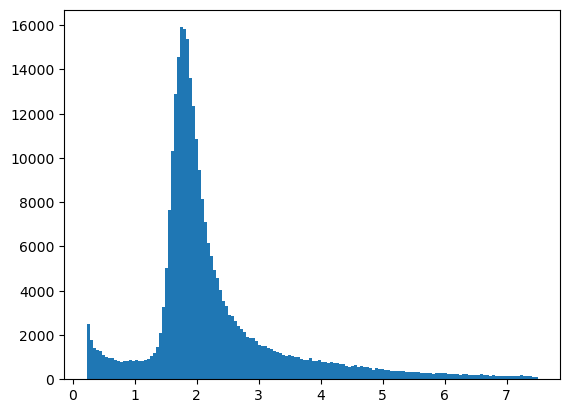

In [42]:
a= ak.flatten(file['rec.reco.trk.calo.2.points.dedx'].array())
plt.hist(a[a<7.5], bins= 150)

(array([ 2066.,  1351.,  1111.,  1043.,   975.,   929.,   880.,   821.,
          784.,   752.,   737.,   704.,   675.,   676.,   666.,   614.,
          677.,   699.,   663.,   744.,   709.,   714.,   717.,   718.,
          760.,   827.,   854.,   979.,  1106.,  1373.,  1952.,  3027.,
         4867.,  7418.,  9882., 12651., 14891., 16137., 16406., 15817.,
        14206., 12955., 11513., 10045.,  8600.,  7255.,  6480.,  5686.,
         5178.,  4663.,  4170.,  3887.,  3377.,  3195.,  2935.,  2700.,
         2562.,  2400.,  2226.,  2081.,  2089.,  1953.,  1792.,  1786.,
         1731.,  1550.,  1594.,  1426.,  1470.,  1387.,  1358.,  1368.,
         1278.,  1258.,  1182.,  1239.,  1115.,  1133.,  1063.,  1024.,
         1023.,   975.,   928.,   914.,   873.,   861.,   801.,   780.,
          753.,   656.,   647.,   676.,   644.,   590.,   603.,   573.,
          566.,   558.,   500.,   500.,   441.,   461.,   438.,   422.,
          414.,   429.,   388.,   370.,   356.,   351.,   321., 

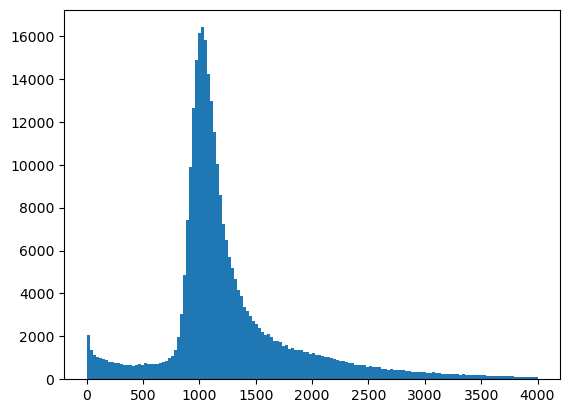

In [39]:
a= ak.flatten(file['rec.reco.trk.calo.2.points.dqdx'].array())
plt.hist(a[a<4000], bins= 150)

(array([1.618e+03, 9.070e+02, 7.130e+02, 6.560e+02, 6.430e+02, 6.290e+02,
        6.830e+02, 7.290e+02, 6.960e+02, 7.120e+02, 7.060e+02, 6.820e+02,
        6.860e+02, 7.050e+02, 6.690e+02, 6.560e+02, 6.650e+02, 6.950e+02,
        7.010e+02, 6.490e+02, 6.560e+02, 6.620e+02, 6.330e+02, 6.150e+02,
        6.260e+02, 6.470e+02, 5.810e+02, 6.100e+02, 5.740e+02, 5.900e+02,
        5.930e+02, 5.930e+02, 5.850e+02, 5.200e+02, 5.410e+02, 5.590e+02,
        5.060e+02, 5.300e+02, 5.190e+02, 4.540e+02, 4.530e+02, 4.670e+02,
        4.330e+02, 4.390e+02, 3.900e+02, 4.000e+02, 4.200e+02, 3.610e+02,
        3.560e+02, 3.450e+02, 3.570e+02, 3.530e+02, 3.180e+02, 3.390e+02,
        2.980e+02, 3.150e+02, 2.790e+02, 2.740e+02, 3.260e+02, 2.990e+02,
        2.500e+02, 2.640e+02, 2.610e+02, 2.690e+02, 2.470e+02, 2.630e+02,
        2.260e+02, 2.490e+02, 2.500e+02, 2.740e+02, 3.000e+02, 2.960e+02,
        3.250e+02, 3.230e+02, 3.690e+02, 3.660e+02, 3.570e+02, 3.570e+02,
        3.380e+02, 3.150e+02, 2.790e+0

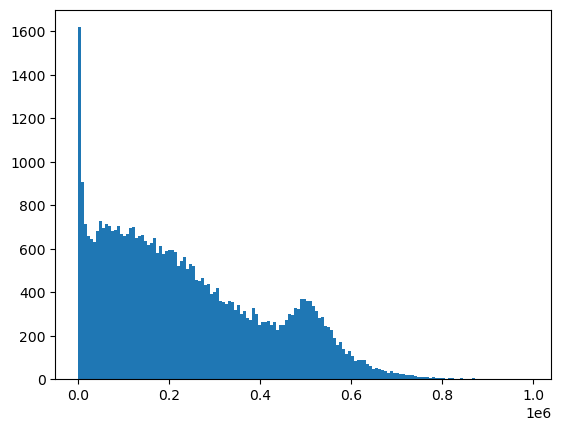

In [40]:
a= ak.flatten(file['rec.reco.trk.calo.1.charge'].array())
plt.hist(a[a<1e6], bins= 150)

(array([1.458e+03, 2.502e+03, 3.128e+03, 3.788e+03, 4.173e+03, 4.551e+03,
        4.644e+03, 5.008e+03, 4.858e+03, 5.061e+03, 5.052e+03, 5.108e+03,
        4.890e+03, 4.831e+03, 4.690e+03, 4.547e+03, 4.429e+03, 4.233e+03,
        4.042e+03, 3.812e+03, 3.821e+03, 3.697e+03, 3.599e+03, 3.312e+03,
        3.190e+03, 3.024e+03, 2.890e+03, 2.826e+03, 2.630e+03, 2.588e+03,
        2.421e+03, 2.327e+03, 2.352e+03, 2.202e+03, 2.096e+03, 2.008e+03,
        2.010e+03, 1.952e+03, 1.851e+03, 1.759e+03, 1.687e+03, 1.573e+03,
        1.569e+03, 1.443e+03, 1.439e+03, 1.428e+03, 1.495e+03, 1.502e+03,
        1.526e+03, 1.648e+03, 1.581e+03, 1.528e+03, 1.476e+03, 1.405e+03,
        1.382e+03, 1.275e+03, 1.209e+03, 1.123e+03, 1.041e+03, 9.500e+02,
        8.180e+02, 8.170e+02, 7.160e+02, 6.930e+02, 6.510e+02, 5.850e+02,
        5.180e+02, 4.570e+02, 4.410e+02, 3.990e+02, 3.790e+02, 3.710e+02,
        3.540e+02, 3.320e+02, 3.160e+02, 2.760e+02, 2.630e+02, 2.150e+02,
        2.370e+02, 1.990e+02, 1.720e+0

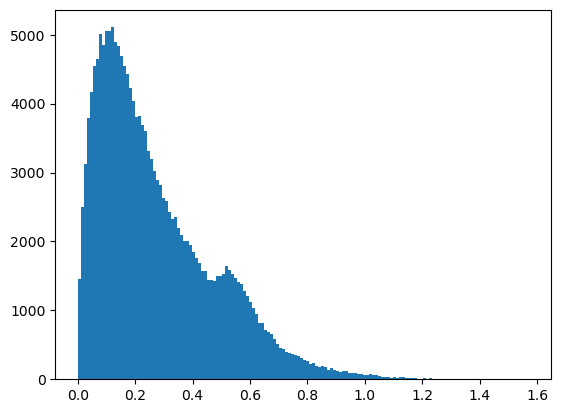

In [48]:
a= ak.flatten(file['rec.slc.reco.shw.open_angle'].array())
plt.hist(a[a>0], bins= 150)

(array([1.1100e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.6000e+01, 8.0000e+00, 3.3000e+02, 1.0830e+03, 6.0440e+03,
        8.7220e+03, 1.2119e+04, 9.4150e+03, 7.5570e+03, 7.1840e+03,
        9.9830e+03, 5.6540e+03, 4.9620e+03, 6.1600e+03, 5.0530e+03,
        3.7230e+03, 3.2520e+03, 4.9580e+03, 3.0520e+03, 2.5390e+03,
        2.9250e+03, 2.8640e+03, 2.1730e+03, 2.00

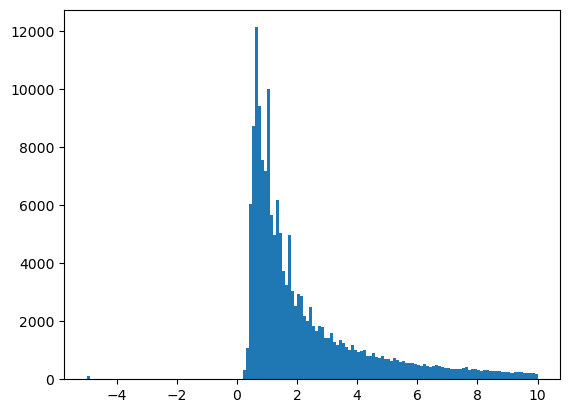

In [54]:
a= ak.flatten(file['rec.slc.reco.shw.len'].array())
plt.hist(a[(a<10)], bins= 150)

/home/giorgio/anaconda3/lib/python3.9/site-packages/awkward/_backends.py:58: RuntimeWarning: invalid value encountered in subtract
  return getattr(ufunc, method)(*args, **kwargs)


(array([8.4181e+04, 5.5000e+01, 4.2000e+01, 1.7000e+01, 2.5000e+01,
        9.0000e+00, 1.7000e+01, 2.2600e+02, 1.7000e+01, 1.5000e+01]),
 array([1.4012985e-45, 3.3997661e+37, 6.7995323e+37, 1.0199299e+38,
        1.3599065e+38, 1.6998830e+38, 2.0398597e+38, 2.3798363e+38,
        2.7198129e+38, 3.0597895e+38, 3.3997661e+38], dtype=float32),
 <BarContainer object of 10 artists>)

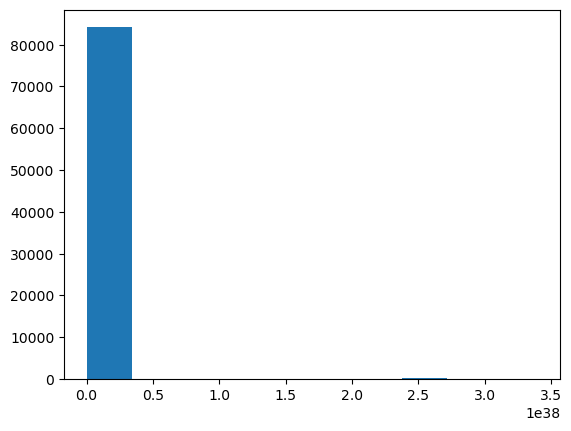

In [86]:
a= ak.flatten(file['rec.crt_tracks.hita.t1'].array()) - ak.flatten(file['rec.crt_tracks.hita.t0'].array())
plt.hist(a[a>0])
